<a href="https://colab.research.google.com/github/cing3000/Reinforcement-Learning-An-Introduction/blob/master/Reinforcement_Learning_Notebook_Chapter_1_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 1: The Reinforcement Learning Problem

## 1.1 Reinforcement Learning

Reinforcement learning problems involve learning what to do - how to map situations to actions - so as to maximize a numerical reward signal.

The three most important distinguishing features of reinforcement learning problem:
* being closed-loop in an essential way
* no having direct instructions as to what actions to take
* where the consequences of actions, including reward signals, play out over extended time periods

Three aspects:
* sensation: be able to sense the state of the environment to some extent
* action: be able to take actions that affect the state
* goal: have a goal or goals relating to the state of the environment

Machine learning paradigm:
* supervised learning
* unsupervised learning
* reinforcement learning

Features of RL:
* exploration-exploitation dilemma: trade-off between exploration and exploitation
* it explicitly considers the *whole* problem of a goal-directed agent interacting with an uncertain environment
* its substantive and fruitful interactions with other engineering and scientific disciplines
* a larger trend in artificial intelligence back toward simple general principles

## 1.3 Elements of Reinforcement Learning

Beyond the agent and the environment, one can identify four main subelements of a reinforcement learning system:
* *a policy*
* *a reward signal*
* *a value function*
* optionally *a model*

Whereas *the reward* signal indicates what is good in an immediate sense, *a value function* specifies what is good in the long run.

<font color='red'>The most important component of almost all reinforcement learning algorithms we consider is a method for efficiently estimating values.</font>

*model-based* | *model-free*/*trail-and-error*

## 1.4 Limitations and Scope

<font color='blue'>Evolutionary methods have advantages on problems in which the learning agent cannot accurately sense the state of its environment.</font>

*policy gradient methods*

## 1.5 An Extended Example: TIC-TAC-TOE

$s$ denote the state before the greedy move, and $s'$ the state after the move, then the update to the estimated value of $s$, denoted $V(s)$, can be wriiten as

$$ V(s) \leftarrow V(s) + \alpha[V(s') - V(s)]$$

where $\alpha$ is a small positive fraction called the *step-size* parameter, which influences the rate of learning.

This update rule is an example of a **temporal-difference** learning method.

## 1.7 History of Reinforcement Learning

Two main threads + one less distinct thread:
* learning by trail and error that started in the psychology of animal learning
* optimal control and its solution using value functions and dynamic programming
* temporal-difference methods

### Optimal Control
In the late 1950s to desribe the problem of designing a controller to minimize a measure of a dynamical system's behavior over time

Mid-1950s by Richard Bellman:
* Bellman Equation
* Markovian Decision Processes (MDPs)

### Trial-and-Error

* "Law of Effect"
* In a 1948 report, Alan Turing, a "pleasure-pain system"
* Minsky, 1961, Steps Tward Artifical Intelligence: how do you distribute credit for success among the many decisions that may have been involved in producing it?

### Temporal-difference


# Chapter 2: Multi-arm Bandits

## 2.1 A k-armed Bandit Problem

## 2.2 Action-value Methods

Estimate the values $Q_t(a)$ of actions:

$$ Q_t(a)\doteq\frac{\text{sum of rewards when a taken prior to t}}{\text{number of times a taken prior to t}}=\frac{\sum_{i=1}^{t-1}R_i\cdot\mathbb{1}_{A_i=a}}{\sum_{i=1}^{t-1}\mathbb{1}_{A_i=a}} $$

*greedy* action selection method:

$$ \DeclareMathOperator*{\argmax}{argmax} \begin{align*} A_t\doteq \argmax_a Q_t(a) \end{align*} $$

*$\epsilon$-greedy* method:

$Q_t(a)$ converge to $q_*(a)$, and the probability of selecting the optimal action converges to greater than $1-\epsilon$, that is, to near certainty.



## 2.3 The 10-armed Testbed

(2000, 10)


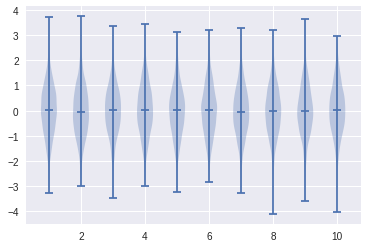

In [0]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

N = 2000
k = 10
Q_star = np.array([np.random.normal(0, 1, k) for i in np.arange(N)])

print(Q_star.shape)

plt.violinplot(Q_star, showmeans=False, showmedians=True)
plt.show()

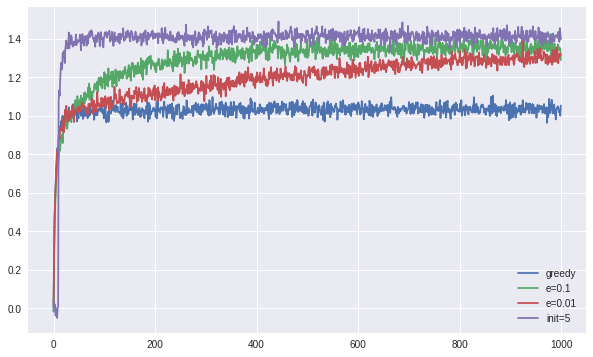

In [0]:
# Bandit model

class Bandit:
    def __init__(self, arms, q_star):
        # states
        self.S = 0
        
        # number of arms
        self.K = arms
        
        # true values of each arm
        self.Q = q_star
        
        # statistics for actions
        self.stats = np.zeros((arms, 2))
        
    def step(self, action):
        self.S += 1
        r = np.random.normal(self.Q[action], 1)
        
        self.stats[action, 0] += 1.0
        self.stats[action, 1] += r
        
        return self.S, r
    
    def reset(self):
        self.S = 0

    def action_stats(self, action):
        return self.stats[action][0], self.stats[action][1]
    
num_steps = 1000

def experiment(epsilon = 0.0, initial_value = 0.0):

    Q = np.zeros((N, k)) + initial_value
    rewards = np.zeros((N, num_steps))
    
    for i in np.arange(N):

        # create the model
        model = Bandit(k, Q_star[i])
        
        for j in np.arange(num_steps):

            if np.random.rand() < epsilon:
                a = np.random.randint(0, k)
            else:
                a = np.argmax(Q[i])

            # move a step
            _, r = model.step(a)

            # record the rewards
            rewards[i, j] = r

            # update value function
            counts, total_rewards = model.action_stats(a)
            Q[i, a] = total_rewards/counts
    
    return rewards

R1 = np.mean(experiment(), axis=0)
R2 = np.mean(experiment(0.1), axis=0)
R3 = np.mean(experiment(0.01), axis=0)

R4 = np.mean(experiment(0.0, 5.0), axis=0)

plt.figure(figsize=(10,6))
plt.plot(R1, label='greedy')
plt.plot(R2, label='e=0.1')
plt.plot(R3, label='e=0.01')
plt.plot(R4, label='init=5')
plt.legend()
plt.show()


## 2.4 Incremental Implementation

$$ Q_{n+1}=\frac{1}{n}\sum_{i=1}{n}R_i=\cdots=Q_n + \frac{1}{n}[R_n - Q_n] $$

The general form is:

$$ \text{NewEstimate} \leftarrow \text{OldEstimate} + \text{StepSize}[\text{Target} - \text{OldEstimate}] $$

The expression $[\text{Target} - \text{OldEstimate}]$ is an *error* in the estimate.

## 2.5 Tracking a Nonstationary Problem

A constant step-size parmater: $\alpha$

$$ Q_{n+1} \doteq Q_n + \alpha[R_n-Q_n] $$

This results in $Q_{n+1}$ being a weighted average of past rewards and the initial estimate $Q_1$:

$$ Q_{n+1} = \cdots = (1-\alpha)^nQ_1 + \sum_{i=1}^{n}\alpha(1-\alpha)^{n-i}R_i $$

The weight decays exponntially according to the exponent on $1-\alpha$. If $1-\alpha=0$, then all the weight goes on the very last reward $R_n$.

This is sometimes called an *exponential recency-weighted average*.

Convergence condition:

$$ \sum_{n=1}^{\infty}\alpha_n(a)=\infty \quad\text{and}\quad \sum_{n=1}^{\infty}\alpha^2_n(a)<\infty $$



## 2.6 Optimistic Initial Values

The upside is that they provide an easy way to supply some prior knowledge about what level of rewards can be expected.



## 2.7 Upper-Confidence-Bound Action Selection

Select action according to:

$$ \DeclareMathOperator*{\argmax}{argmax} \begin{align*} A_t\doteq \argmax_a \Bigg[Q_t(a)+c\sqrt{\frac{\ln{t}}{N_t(a)}}\Bigg] \end{align*}  $$

$N_t(a)$ denotes the number of times that action $a$ has been selected prior to time $t$, and the number $c>0$ controls the degree of exploration.

<font color='red'>So when $a$ has been picked more, $N_t(a)$ is getting bigger, decrease the possibility to pick up $a$ again. When $a$ has been picked up, $t$ is getting bigger, which increase the possibility to pick up $a$. </font>



## 2.8 Gradient Bandit Algorithms

Consider learning a numerical *preference* for each action *a*,  which we denote $H_t(a)$.

The relative preference are determined according to a *soft-max distribution* as follows:

$$ Pr\{A_t=a\} \doteq \frac{e^{H_t(a)}}{\sum_{b=1}^k e^{H_t(b)}} \doteq \pi_t(a) $$

SGA (Stochastic Gradient Ascent):
On each step, after selecting action $A_t$ and receiving the reward $R_t$, preferences are updated by:

$$ \begin{cases} H_{t+1}(A_t)\doteq H_t(A_t)+\alpha (R_t - \bar{R}_t)(1-\pi_t(A_t)), &  \text{and} \\ H_{t+1}(a)\doteq H_t(a)-\alpha (R_t-\bar{R}_t)\pi_t(a), & \text{for all }a\neq A_t \end{cases} $$

where $\alpha > 0$ is a step-size parameter, and $\bar{R}_t \in \mathbb{R}$ is the average of all the rewards up through and invluding time $t$, which can be computed incrementally as described in Section 2.4 (or Section 2.5 if the problem is nonstationary). The $\bar{R}_t$ term serves as a baseline with which the reward is compared.


<font color='red'>Note: because the relative preference $\pi_t(a)$ are softmax distribution, which means the highly preferred $A_t$ will have exponential  advantage over other $a$, reward over baseline $R_t-\bar{R}_t$ only contributes $1-\pi_t(A_t)$ to new $H_{t+1}(A_t)$, which will is getting smaller if $A_t$ kept being picked. Other $H_{t+1}(a)$ actually decrease more and more.</font>

How we get there:
$$ H_{t+1}(a) \doteq H_t(a) + \alpha \frac{\partial{\mathbb{E}[R_t]}}{\partial{H_t(a)}} $$
$$ \mathbb{E}[R_t]=\sum_b \pi_t(b) q_*(b) $$

<font color='red'>Note: as before, softmax function $\pi_t(a)$ should looks like the possibility to pick action $a$. </font>

## 2.9 Associative Search (Contextual Bandits)

Nonassociative tasks:
$$ \text{action} \nsim \text{situation} $$

Associative tasks:
$$ \text{situation} \mapsto \text{action} $$

# Chapter 3: Finite Markov Decision Processes



## 3.1 The Agent-Environment Interface

MDPs are meant to be a straightforward framing of the problem of learning from interaction to achieve a **goal**.

The learner and decision maker is called the **agent**.

The thing it interacts with, comprising everything outside the agent, is called the **environment**.

<img alt="The agent-environment interaction in a Markov decision process" src="https://cdn-images-1.medium.com/max/1600/1*mPGk9WTNNvp3i4-9JFgD3w.png" width="400" />

In a finite MDP, we can define:

$$ p(s',r\mid s,a) \doteq Pr\{S_t=s', R_t=r \mid S_{t-1}=s, A_{t-1}=a\} \tag{3.4}$$

for all $s',s \in \mathcal{S}$, $r \in \mathcal{R}$, and $a \in \mathcal{A}(s)$.

Anything that cannot be changed arbitrarily by the agent is considered to be outside of it and thus part of its environment.

The agent-environment boundary represents the limit of the agent's **absolute control**, not of its knowledge.

MDP framework proposes any problem of learning goal-directed behavior can be reduced to three signals passing back and forth between an agent and its environment:
* **actions**: one signal to represent the choices made by the agent
* **the states**: one signal to represent the basis on which the choices are made
* **rewards**: one signal to define the agent's goal



## 3.2 Goals and Rewards

The **reward hypothesis**:

<font color='red'>That all of what we mean by goals and purposes can be well thought of as the maximization of the expected value of the cumulative sum of a received scalar signal (called reward).</font>



## 3.3 Returns and Episodes

In general, we seek to maximize the **expected return**, where the return, denoted $G_t$, is defined as some specific function of the reward sequence.

In simplest case:

$$ G_t \doteq R_{t+1} + R_{t+2} + R_{t+3} + \cdots + R_T$$

where $T$ is a final time step.

The agent-environment interaction breaks natually into subsequences, which we call **episodes**.

Tasks with episodes of this kind are called **episodic tasks**.

In episodic tasks, all nonterminal states, denoted $\mathcal{S}$, and the set of all states plus the terminal state, denoted $\mathcal{S^+}$.

In many cases the agent-environment interaction does not break natually into identifiable episodes, but goes on continually without limit. We call these **continuing tasks**.

Because the final time step world be $T=\infty$, and the return could be easily be infinite.

In this case, we need the additional concept of **discounting** and **discounted return**:

$$ G_t \doteq R_{t+1}+\gamma R_{t+2}+\gamma^2 R_{t+3}+\cdots=\sum_{k=0}^\infty R_{t+k+1} \tag{3.8}$$

where $\gamma$ is a parameter, $0\leq \gamma \leq 1$, called the **discount rate**.



## 3.4 Unified Notation for Epsiodic and Continuing Tasks

$$ G_t \doteq \sum_{k=t+1}^{T}\gamma^{k-t-1}R_k $$

## 3.5 Policies and Value Functions

Formally, a **policy** is a mapping from states to probabilities of selecting each possible action.

If the agent is following policy $\pi$ at time $t$, then $\pi(a\mid s)$ is the probability that $A_t=a$ if $S_t=s$.

The **value** of a state $s$ under a policy $\pi$, denoted $v_\pi(s)$, is the expected return when starting in $s$ and following $\pi$ thereafter.

We call the function $v_\pi$ the **state-value function for policy $\pi$**.

$$ v_\pi(s) \doteq \mathbb{E}_\pi[G_t\mid S_t=s]=\mathbb{E}\bigg[\sum_{k=0}^\infty \gamma^k R_{t+k+1} \bigg\vert S_t=s \bigg] \text{, for all } s\in\mathcal{S} $$

We call the function $q_\pi$ the **action-value function for policy $\pi$**.

$$ q_\pi(s,a) \doteq \mathbb{E}_\pi[G_t\mid S_t=s, A_t=a]=\mathbb{E}\bigg[\sum_{k=0}^\infty \gamma^k R_{t+k+1} \bigg\vert S_t=s,A_t=a \bigg]$$

** Bellman equation for $v_\pi$**:

<font color='red'>$$ v_\pi(s) \doteq \sum_a\pi(a\mid s)\sum_{s',r}p(s',r\mid s,a)\big[r+\gamma v_\pi(s')\big] \tag{3.14}$$</font>

** Bellman equation for $q_\pi$**:

<font color='red'>$$ q_\pi(s,a)\doteq\sum_{s',r}p(s',r\mid s,a)\bigg[r+\gamma \sum_{a'}\pi(a'\mid s') q_\pi(s',a')\bigg] $$</font>

## 3.6 Optimal Policies and Optimal Value Functions

**Optimal policy**:
$$ \pi \geq \pi' \text{ if and only if } v_\pi(s) \geq v_{\pi'}(s) \text{ for all } s \in \mathcal{S} $$

**Optimal state-value function**:
$$ v_*(s)\doteq\max_{\pi}v_\pi(s) \tag{3.15}$$

**Optimal action-value function**:
$$ q_*(s,a)\doteq\max_{\pi}q_\pi(s,a) \tag{3.16}$$

**Bellman optimality equation for $v_*$**:
<font color="red">$$ v_*(s)=\max_a\sum_{s',r}p(s',r\mid s,a)\big[r+\gamma v_*(s')\big] \tag{3.19}$$</font>

**Bellman optimality equation for $q_*$**:
<font color="red">$$ q_*(s,a)=\sum_{s',r}p(s',r\mid s,a)\Big[r+\gamma \max_{a'} q_*(s',a')\Big] \tag{3.20}$$</font>



## 3.7 Optimality and Approximation

In tasks with small, finite state sets, it is possible to form the these approximations using arrays or tables with one entry for each state (or state-action pair). This we call the **tabular** case.

In many cases of practical interest, however, there are far more states than could possibly be entries in a table. In these cases the functions must be approximated, using some sort of more compact parameterized function representation.

## 3.8 Summary

The **actions** are the choices made by the agent; the **states** are the basis for making the choices; and the **rewards** are the basis of evaluating the choices.

# Chapter 4: Dynamic Programming

The term dynamic programming (DP) refers to collection of algorithms that can be used to compute optimal policies given a perfect model of the environment as a MDP.

The key idea of DP, and of reinforcement learning generally, is the use of value functions to organize and structure the search for good policies.

## 4.1 Policy Evaluation (Prediction)

$$ \begin{align} v_\pi(s) &\doteq \mathbb{E}_\pi\big[G_t\mid S_t=s\big] \\ 
 &= \sum_a\pi(a\mid s)\sum_{s',r}p(s',r\mid s,a)\Big[r+\gamma v_\pi(s')\Big] \end{align} \tag{4.4}$$

Iterative policy evaluation, pseudo code is showed as below.

---
Input $\pi$, the policy to be evaluated<br/>
Initialize an array $V(s)=0$, for all $s\in\mathcal{S}^+$<br/>
Repeat
>$\Delta\leftarrow 0$<br/>
>For each $s\in\mathcal{S}$:
>>$v\leftarrow V(s)$<br/>
>>$V(s)\leftarrow \sum_a\pi(a\mid s)\sum_{s',r}p(s',r\mid s,a)\big[r+\gamma v_\pi(s')\big]$<br/>
>>$\Delta\leftarrow\max(\Delta, |v-V(s)|)$

until $\Delta \lt \theta$ (a small positive number)<br/>
Output $V \approx v_\pi$

---

## 4.2 Policy Improvement

Selecting an action $a \neq \pi(s) $, and thereafter following the existing policy $\pi$. The value of this way of behaving is:
$$ q_\pi(s,a) = \sum_{s',r}p(s',r\mid s,a)\Big[r+\gamma v_\pi(s')\Big] $$

$$ q_\pi(s,\pi'(s)) \geq v_\pi(s) \implies v_{\pi'}(s)\geq v_\pi(s) $$

$\pi'(s)$ is identical to $\pi$ except that $\pi'(s)=a\neq\pi(s)$.

$$ \pi'(s)=\argmax_a\sum_{s',r}p(s',r\mid s,a)\Big[r+\gamma v_\pi(s')\Big] \tag{4.9}$$



## 4.3 Policy Iteration

$$ \pi_0 \xrightarrow{E} v_{\pi0} \xrightarrow{I} \pi_1 \xrightarrow{E} \cdots \xrightarrow{I} \pi_* \xrightarrow{E} v_* $$

where $\xrightarrow{E}$ denotes a **policy evaluation** and $\xrightarrow{I}$ denotes a **policy improvement**.

This way of finding an optimal policy is called **policy iteration**. Pseude code is given below.

---

1. Initialization<br/>$V(s) \in \mathbb{R}$ and $\pi(s) \in \mathcal{A}(s)$ arbitrarily for all $s \in \mathcal{S}$
1. Policy Evaluation<br/>
Repeat
>$\Delta \leftarrow 0$<br/>
>For each $s \in \mathcal{S}$:
>>$v\leftarrow V(s)$<br/>
>>$V(s) \leftarrow \sum_{s',r}p(s',r | s,\pi(s))[r + \gamma V(s')]$<br/>
>>$\Delta \leftarrow \max(\Delta, |v-V(s)|)$<br/>
<font>until $\Delta \lt \theta$  (a small positive number)</font>

1. Policy Improvement<br/>
$\text{policy-stable } \leftarrow \text{ true}$<br/>
For each $s \in \mathcal{S}$:
>$\text{old-action} \leftarrow \pi(s)$<br/>
>$\pi(s)\leftarrow \argmax_a \sum_{s',r}p(s',r |s,a)[r+\gamma V(s')]$<br/>
>If $\text{old-action} \ne \pi(s)$, then $\text{policy-stable}\leftarrow \text{false}$<br/>
<font>If $\text{policy-stable}$, then stop and return $V\approx v_\star$ and $\pi\approx\pi_\star$; else go to 2</font>

---

**Example 4.2: Jack's Car Rental**

Jack manages two locations for a nationwide car rental company. Each day, some number of customers arrive at each location to rent cars. If Jack has a car available, he rents it out and is credited $10 by the national company. If he is out of cars at that location, then the business is lost. Cars become available for renting the day after they are returned. To help ensure that cars are available where they are needed, Jack can move them between the two locations overnight, at a cost of \$2 per car moved.

We assume that the number of cars requested and returned at each location are Poisson random variables, meaning that the probability that the number is $n$ is $\frac{\lambda}{n!}e^{-\lambda}$, where $\lambda$ is the expected number. Suppose $\lambda$ is 3 and 4 for rental requests at the first and second locations and 3 and 2 for returns. To simplify the problem slightly, we assume that there can be no more than 20 cars at each location (any additional cars are returned to the nationwide company, and thus disappear from the problem) and a maximum of  5 cars can be moved from one location to the other in one
night.

We take the discount rate to be  $\gamma=0.9$ and formulate this as a continuing finite MDP, where
the time steps are days, the state is the number of cars at each location at the end of the day, and
the actions are the net numbers of cars moved between the two locations overnight.

69.52 62.36 55.92 49.98 44.21 38.56 33.25 28.51 24.46 21.08 18.29 15.97 14.04 12.40 10.99 9.78 8.72 7.78 6.96 6.22 5.57 4.99 4.47 4.00 3.59 3.21 2.88 2.58 2.31 2.07 1.86 1.67 1.49 1.34 1.20 1.08 0.97 
36.26 22.28 8.32 2.46 1.65 1.32 1.13 1.02 0.91 
3.58 2.49 2.04 1.72 1.50 1.33 1.17 1.02 0.88 
0.88 
0.65 


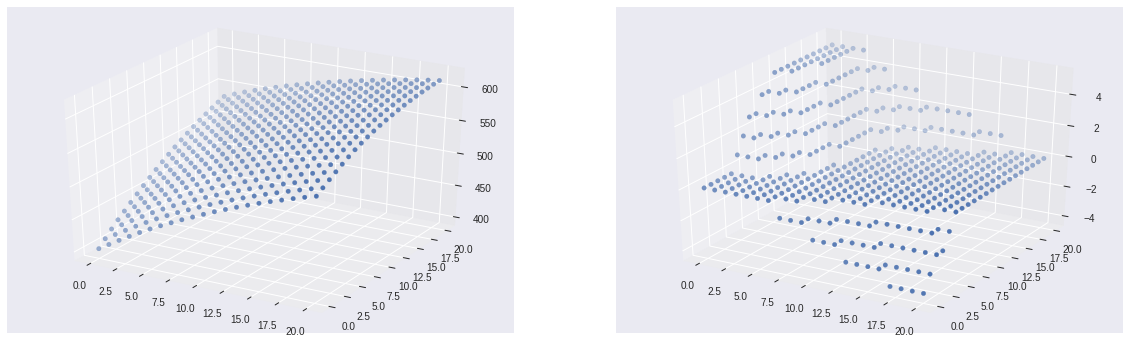

In [0]:
import numpy as np
import time

# No more than 20 cars at each location
MAX = 20
S = MAX + 1

# Action space [-5, 5]
A = 5

# GAMMA for policy iteration
GAMMA = 0.9

# poisson distribution
def poisson(n, lam):
    return lam**n * np.exp(-lam)/np.math.factorial(n)

# requests and returns possiblities
p_dict = np.zeros((4, S))
for s in range(S):
    p_dict[0][s] = poisson(s, 3)            # location 1 request
    p_dict[1][s] = poisson(s, 4)            # location 2 request
    p_dict[2][s] = poisson(s, 3)            # location 1 return
    p_dict[3][s] = poisson(s, 2)            # location 2 return

p_matrix = np.zeros((S, S, S, S))
for x1 in range(S):
    for x2 in range(S):
        for x3 in range(S):
            for x4 in range(S):
                p_matrix[x1, x2, x3, x4] = p_dict[0][x1] * p_dict[1][x2] * p_dict[2][x3] * p_dict[3][x4]

# v(s) will be a table of values at all possible states (SxS)
V = np.zeros((S, S))

# the same as pi(s)
pi = np.zeros((S, S))

# bellman equation
def bellman_equation(l1, l2, action):
    
    v = - 2 * np.absolute(action)
    
    # cars left overnight
    l1_avai = min(l1 - action, MAX)
    l2_avai = min(l2 + action, MAX)
    
    # iterate on all s' and sum up
    for q1 in range(11):
        
        # rental
        l1_rent = min(l1_avai, q1)
        
        for q2 in range(11):

            # rental
            l2_rent = min(l2_avai, q2)
            r = (l1_rent + l2_rent) * 10
            
            for r1 in range(11):
                
                # new state s'
                l1_new = min(l1_avai + r1 - l1_rent, MAX)
                
                for r2 in range(11):

                    # p(s',r | s, a)
                    p = p_matrix[q1, q2, r1, r2]
                    
                    # new state s'
                    l2_new = min(l2_avai + r2 - l2_rent, MAX)

                    # sum
                    v += p * (r + GAMMA * V[l1_new][l2_new])

    return v

# policy iteration
policy_stable = False

while policy_stable != True:
    policy_stable = True
    
    # policy evaluation
    theta = 1
    
    # Initialize delta, make sure it is greater than theta
    delta = theta + 1
    
    # Repeat, until delta < theta
    while delta >= theta:

        # tic 
        t = time.time()
        
        # delta <- 0
        delta = 0
        
        # new V
        V_new = np.zeros((S, S))

        for l1 in range(S):
            for l2 in range(S):
                v = V[l1, l2]

                # calculate new V(s) with bellman equation
                V_new[l1, l2] = bellman_equation(l1, l2, int(pi[l1, l2]))

                # converged?
                d = np.absolute(v - V_new[l1, l2])
                if d > delta:
                    delta = d

        V = V_new.copy()

        # toc
        #print("iteration in %.2f secs, delta is %.2f" % ((time.time()-t), delta))
        print("%.2f" % delta, end=' ')
        
    print()

    # policy improvement
    for l1 in range(S):
        for l2 in range(S):
            
            # tic 
            t = time.time()
            
            old_action = pi[l1, l2]
            
            # argmax_a bellman_equation
            max_value = -1
            a_min = -min(l2, A)
            a_max = min(l1, A)
            for a in range(a_min, a_max+1):
                value = bellman_equation(l1, l2, int(a))
                if value > max_value:
                    max_value = value
                    pi[l1, l2] = a

            # policy converge?
            if old_action != pi[l1, l2]:
                policy_stable = False
            
            # toc
            #print("update action in %.2f secs at (%d, %d), %d --> %d" %
            #      ((time.time()-t), l1, l2, old_action, pi[l1, l2]))
            

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig = plt.figure(figsize=[20, 6])
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(np.tile(np.arange(S), S), np.repeat(np.arange(S), S), np.ndarray.flatten(V))

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(np.tile(np.arange(S), S), np.repeat(np.arange(S), S), np.ndarray.flatten(pi))

plt.show()

## 4.4 Value Iteration

One important special case is when policy evaluation is stopped after just one sweep (one update of each state). This algorithm is called **value iteration**.

$$ \begin{align} v_{k+1}(s) &\doteq\max_a\mathbb{E}\Big[R_{t+1} + \gamma v_k(S_{t+1}) \mid S_t=s,A_t=a\Big] \\ &=\max_a\sum_{s',r}p(s',r\mid s,a)\Big[r+\gamma v_k(s')\Big] \end{align} \tag{4.10}$$

for all $s \in \mathcal{S} $.

<font color="red">Value iteration is obtained simply by turning the Bellman optimality equation into an update rule. Also note how the value iteration update is identical to the policy evaluation update except that it requires the maximum to be taken over all actions.</font>

iteration in 77.38 secs, delta is 69.52
iteration in 77.70 secs, delta is 62.36
iteration in 78.64 secs, delta is 55.92
iteration in 78.27 secs, delta is 50.03
iteration in 78.02 secs, delta is 44.56
iteration in 78.04 secs, delta is 39.52
iteration in 78.00 secs, delta is 34.96
iteration in 78.56 secs, delta is 30.86
iteration in 78.25 secs, delta is 27.17
iteration in 78.17 secs, delta is 23.85
iteration in 78.10 secs, delta is 20.88
iteration in 78.51 secs, delta is 18.26
iteration in 78.09 secs, delta is 15.95
iteration in 78.70 secs, delta is 13.95
iteration in 78.39 secs, delta is 12.22
iteration in 77.64 secs, delta is 10.73
iteration in 77.90 secs, delta is 9.44
iteration in 78.09 secs, delta is 8.33
iteration in 78.71 secs, delta is 7.36
iteration in 79.07 secs, delta is 6.52
iteration in 78.33 secs, delta is 5.79
iteration in 78.57 secs, delta is 5.14
iteration in 78.56 secs, delta is 4.58
iteration in 78.88 secs, delta is 4.08
iteration in 78.03 secs, delta is 3.64
iteration

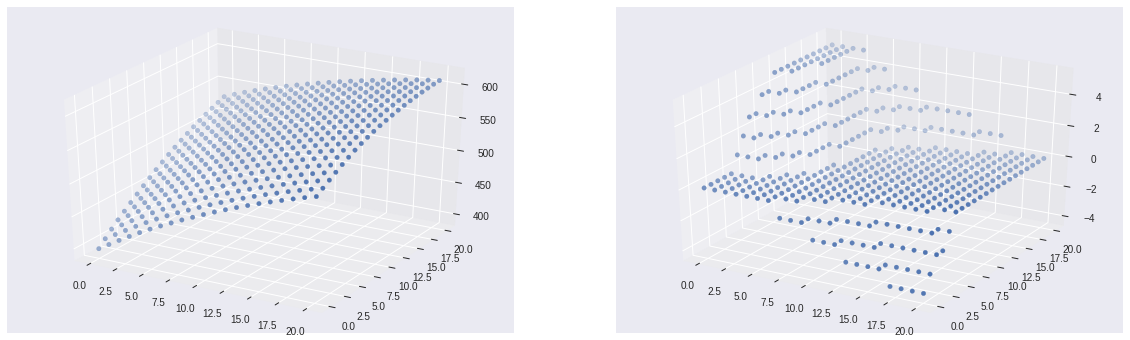

In [0]:
import numpy as np
import time

# No more than 20 cars at each location
MAX = 20
S = MAX + 1

# Action space [-5, 5]
A = 5

# GAMMA for policy iteration
GAMMA = 0.9

# poisson distribution
def poisson(n, lam):
    return lam**n * np.exp(-lam)/np.math.factorial(n)

# requests and returns possiblities
p_dict = np.zeros((4, S))
for s in range(S):
    p_dict[0][s] = poisson(s, 3)            # location 1 request
    p_dict[1][s] = poisson(s, 4)            # location 2 request
    p_dict[2][s] = poisson(s, 3)            # location 1 return
    p_dict[3][s] = poisson(s, 2)            # location 2 return

p_matrix = np.zeros((S, S, S, S))
for x1 in range(S):
    for x2 in range(S):
        for x3 in range(S):
            for x4 in range(S):
                p_matrix[x1, x2, x3, x4] = poisson(x1, 3) * poisson(x2, 4) * poisson(x3, 3) * poisson(x4, 2)

# v(s) will be a table of values at all possible states (SxS)
V = np.zeros((S, S))

# the same as pi(s)
pi = np.zeros((S, S))

# bellman equation
def bellman_equation(l1, l2, action):
    
    v = - 2 * np.absolute(action)
    
    # cars left overnight
    l1_avai = min(l1 - action, MAX)
    l2_avai = min(l2 + action, MAX)
    
    # iterate on all s' and sum up
    for q1 in range(11):
        
        # rental
        l1_rent = min(l1_avai, q1)
        
        for q2 in range(11):

            # rental
            l2_rent = min(l2_avai, q2)
            r = (l1_rent + l2_rent) * 10
            
            for r1 in range(11):
                
                # new state s'
                l1_new = min(l1_avai + r1 - l1_rent, MAX)
                
                for r2 in range(11):

                    # p(s',r | s, a)
                    p = p_matrix[q1, q2, r1, r2]
                    
                    # new state s'
                    l2_new = min(l2_avai + r2 - l2_rent, MAX)

                    # sum
                    v += p * (r + GAMMA * V[l1_new][l2_new])

    return v

    
# policy evaluation
theta = 1

# Initialize delta, make sure it is greater than theta
delta = theta + 1

# Repeat, until delta < theta
while delta >= theta:

    # tic 
    t = time.time()

    # delta <- 0
    delta = 0

    # new V
    V_new = np.zeros((S, S))

    for l1 in range(S):
        for l2 in range(S):
            v = V[l1, l2]

            # value interation
            max_value = -1
            a_min = -min(l2, A)
            a_max = min(l1, A)
            for a in range(a_min, a_max+1):
                value = bellman_equation(l1, l2, int(a))
                if value > max_value:
                    max_value = value
                    pi[l1, l2] = a
                    V_new[l1, l2] = value

            # converged?
            d = np.absolute(v - V_new[l1, l2])
            if d > delta:
                delta = d

    V = V_new.copy()

    # toc
    print("iteration in %.2f secs, delta is %.2f" % ((time.time()-t), delta))
    #print("%.2f" % delta, end=' ')

print()
            

from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt

fig = plt.figure(figsize=[20, 6])
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(np.tile(np.arange(S), S), np.repeat(np.arange(S), S), np.ndarray.flatten(V))

ax2 = fig.add_subplot(122, projection='3d')
ax2.scatter(np.tile(np.arange(S), S), np.repeat(np.arange(S), S), np.ndarray.flatten(pi))

plt.show()

## 4.5 Asynchronous Dynamic Programming

A major drawback to the DP methods that we hae discussed so far is that they involve operations over the entire state set of the MDP, that is, they require sweeps of the state set.

## 4.6 Generalized Policy Iteration

We use the term **generalized policy iteration (GPI)** to refer to the general idea of letting policy evluation and policy imporovement processes interact, independent of the granularity and other details of the two processes.

The interaction between the evaluation and improvement processes in GPI in terms of two contraints or goals.

<img src="http://www.incompleteideas.net/book/ebook/imgtmp5.png" width="300" />

## 4.7 Efficiency of Dynamic Programming

DP methods take to find an optimal policy is polynomial in the number of states and actions.

DP is sometimes thought to be of limited applicability because of the **curse of diensionality**, the fact that the number of states often grows exponential with the number of state variables.